In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!cp /content/drive/MyDrive/iot.zip /content

In [10]:
!mkdir iot

mkdir: cannot create directory ‘iot’: File exists


In [11]:
!unzip /content/iot.zip -d "/content/iot"

Archive:  /content/iot.zip
  inflating: /content/iot/Network Anamoly Detection.docx  
  inflating: /content/iot/Test.txt   
  inflating: /content/iot/Train.txt  


In [12]:
df1=pd.read_csv("/content/iot/Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df1


,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [13]:
df1.shape

(125973, 43)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [15]:
df1.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [16]:
df1.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [17]:
df1.dtypes

duration                    int64
protocoltype               object
service                    object
flag                       object
srcbytes                    int64
dstbytes                    int64
land                        int64
wrongfragment               int64
urgent                      int64
hot                         int64
numfailedlogins             int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numroot                     int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
numoutboundcmds             int64
ishostlogin                 int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
srvserrorrate             float64
rerrorrate                float64
srvrerrorrate             float64
samesrvrate               float64
diffsrvrate   

In [18]:
for col in df1.columns:
    #if df[col].dtype=='object' :
        print()
        print(df1[col].value_counts())


duration
0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64

protocoltype
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

srcbytes
0        49392
8         3691
1         2432
44        2334
45        2089
         ...  
1940         1
12973        1
1899         1
1661         1
2358         1
Name: count, Length: 3341, dtype: int64

dstbytes


In [19]:
# Seperating categorical and numerical variable in train dtaset
cat_list=df1.select_dtypes(include='object').columns.tolist()
cat_list

['protocoltype', 'service', 'flag', 'attack']

In [20]:
#land, urgent, numfailedlogins, numoutboundcmds have mostly zero values so we can drop these columns
df1.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [21]:
# we can make all other classes other than normal as attack
df1['attack'].loc[df1['attack']!='normal']='attack'

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['service']=le.fit_transform(df1['service'])
df1['flag']=le.fit_transform(df1['flag'])
df1['attack']=le.fit_transform(df1['attack'])


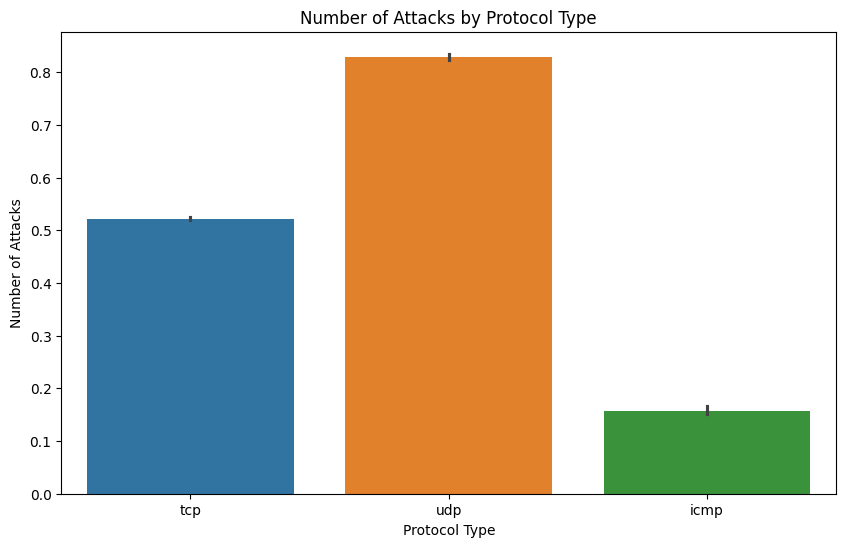

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot between protocol_type and attack
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
plt.figure(figsize=(10, 6))
sns.barplot(x='protocoltype', y='attack', data=df1,palette=colors)  # Using len to count occurrences
plt.xlabel('Protocol Type')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Protocol Type')
plt.show()


In [24]:
df1['protocoltype']=le.fit_transform(df1['protocoltype'])

<Axes: >

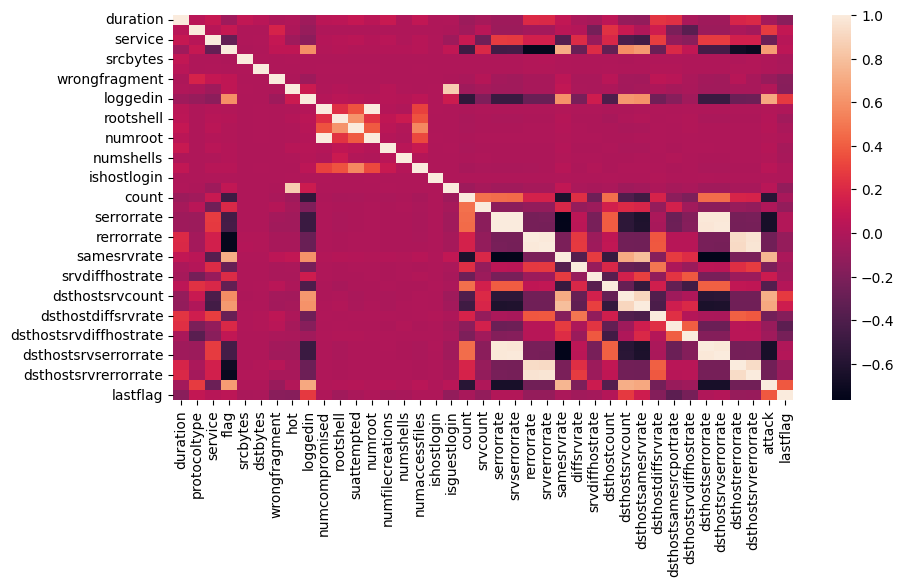

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr())

In [26]:
df1['attack'].value_counts()

attack
1    67343
0    58630
Name: count, dtype: int64

<Axes: xlabel='attack', ylabel='count'>

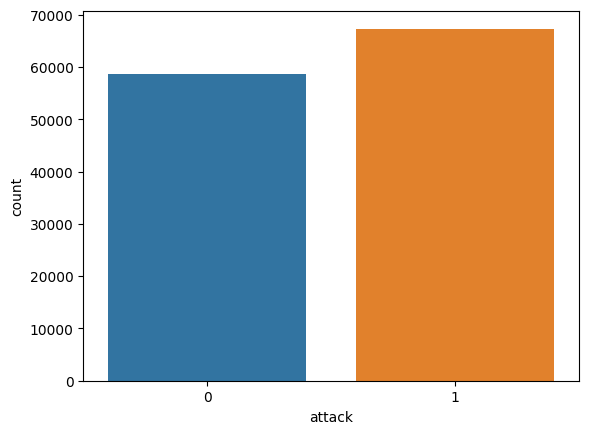

In [27]:
colors = ["#1f77b4", "#ff7f0e"]
sns.countplot(x=df1['attack'], palette=colors)

In [28]:
df2=pd.read_csv("/content/iot/Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df2


,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [29]:
df2.shape

(22544, 43)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                22544 non-null  int64  
 1   protocoltype            22544 non-null  object 
 2   service                 22544 non-null  object 
 3   flag                    22544 non-null  object 
 4   srcbytes                22544 non-null  int64  
 5   dstbytes                22544 non-null  int64  
 6   land                    22544 non-null  int64  
 7   wrongfragment           22544 non-null  int64  
 8   urgent                  22544 non-null  int64  
 9   hot                     22544 non-null  int64  
 10  numfailedlogins         22544 non-null  int64  
 11  loggedin                22544 non-null  int64  
 12  numcompromised          22544 non-null  int64  
 13  rootshell               22544 non-null  int64  
 14  suattempted             22544 non-null

In [31]:
df2.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [32]:
df2.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [33]:
#land, urgent, numfailedlogins, numoutboundcmds have mostly zero values so we can drop these columns
df2.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [34]:
# we can make all other classes other than normal as attack
df2['attack'].loc[df2['attack']!='normal']='attack'

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['protocoltype']=le.fit_transform(df2['protocoltype'])
df2['service']=le.fit_transform(df2['service'])
df2['flag']=le.fit_transform(df2['flag'])
df2['attack']=le.fit_transform(df2['attack'])


In [36]:
df2['attack'].value_counts()

attack
0    12833
1     9711
Name: count, dtype: int64

<Axes: xlabel='attack', ylabel='count'>

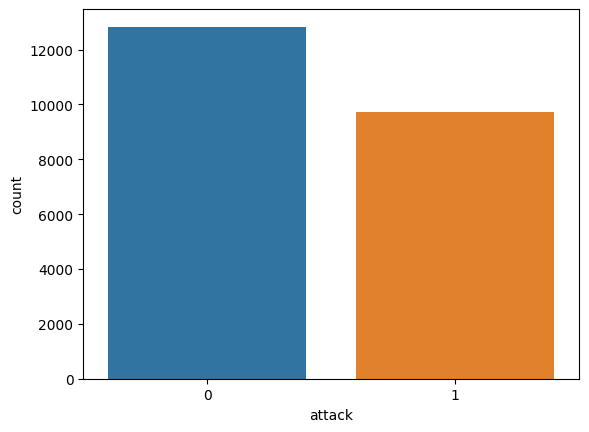

In [37]:
colors = ["#1f77b4", "#ff7f0e"]
sns.countplot(x=df2['attack'], palette=colors)


In [38]:
x_train=df1.drop(['attack'],axis=1)
y_train=df1['attack']

In [39]:
x_train.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,1,24,9,232,8153,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,1,24,9,199,420,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [40]:
y_train.head()

0    1
1    1
2    0
3    1
4    1
Name: attack, dtype: int64

In [41]:
x_test=df2.drop(['attack'],axis=1)
y_test=df2['attack']

In [42]:
x_test.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,21
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,15
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11


In [43]:
y_test.head()

0    0
1    0
2    1
3    0
4    0
Name: attack, dtype: int64

In [44]:
#normalization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, classification_report
r1=accuracy_score(y_test, lr_pred)
print(r1)

0.8425745209368346


In [47]:
print(classification_report(y_test, lr_pred))


              precision    recall  f1-score   support

           0       0.93      0.78      0.85     12833
           1       0.76      0.92      0.84      9711

    accuracy                           0.84     22544
   macro avg       0.85      0.85      0.84     22544
weighted avg       0.86      0.84      0.84     22544



Support Vector

In [48]:
from sklearn.svm import SVC

# Create and train the SVM model
svm = SVC()
svm.fit(x_train,y_train)

# Make predictions on the test set
svm_pred = svm.predict(x_test)



In [49]:
# Evaluate the SVM model
r2 =accuracy_score(y_test, svm_pred)
print(r2)


0.8576561391057488


In [50]:
print( classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     12833
           1       0.77      0.96      0.85      9711

    accuracy                           0.86     22544
   macro avg       0.87      0.87      0.86     22544
weighted avg       0.88      0.86      0.86     22544



Naive bayes

In [51]:
# Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Train the model
nb.fit(x_train, y_train)
y_pred_gb = nb.predict(x_test)


In [52]:
# Evaluate the navive bayes model
r3 = accuracy_score(y_test, y_pred_gb)
print(r3)



0.8100159687721789


In [53]:
print( classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81     12833
           1       0.72      0.91      0.81      9711

    accuracy                           0.81     22544
   macro avg       0.82      0.82      0.81     22544
weighted avg       0.83      0.81      0.81     22544



KNN


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)



In [55]:
#Evaluate the knn model
r4 = accuracy_score(y_test, y_pred_knn)
print(r4)


0.826472675656494


In [56]:
# Generating a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     12833
           1       0.72      0.97      0.83      9711

    accuracy                           0.83     22544
   macro avg       0.85      0.84      0.83     22544
weighted avg       0.86      0.83      0.83     22544



Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf.fit(x_train, y_train)

# Predicting on the test set
y_pred_rf = rf.predict(x_test)



In [58]:
# Evaluating the model
r5=accuracy_score(y_test, y_pred_rf)
print(r5)


0.8165809084457062


In [59]:
# Generating a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     12833
           1       0.71      0.97      0.82      9711

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544



Text(0.5, 1.0, 'accuracy with different models')

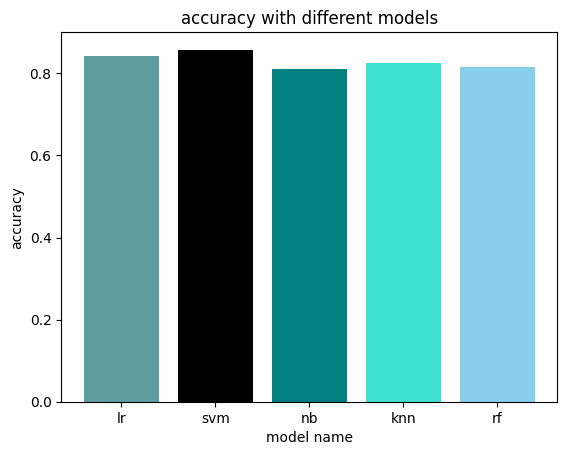

In [60]:
all=['lr','svm','nb','knn','rf']
result=[r1,r2,r3,r4,r5]
colors=['cadetblue','black','teal','turquoise','skyblue']
plt.bar(all,result,color=colors)
plt.xlabel('model name')
plt.ylabel('accuracy')
plt.title('accuracy with different models')